## Logistic regression model building                                  
Logistic regression is one of the widely used models for binary classification problems.                   
Logistic regression can be used for various classification problems such as spam detection, diabetes prediction etc.

Here we use Pima Indian diabetes dataset to predict whether the patient has diabetes or not. 

In [2]:
import pandas as pd

# Load data using pandas
pima_data = pd.read_csv("diabetes.csv")

### Exploratory data analysis

In [3]:
pima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_data.shape

(768, 9)

In [5]:
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Now we know that there are 768 people with uneven distribution of outcome 500:268 for outcome 0:1

### Selecting features
Now we divide given columns into two types - dependent (target) variable and independent variables (features)

In [8]:
features = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = pima_data[features]
y = pima_data.Outcome

### Splitting data

To understand model performance, dividing the dataset into training set and test set is a good practice.

In [9]:
# Split data into training and test
from sklearn.model_selection import train_test_split

# 75% training and 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

### Model development and prediction

In [10]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='liblinear')

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

### Model Evaluation using Confusion matrix

A confusion matrix is a table used to evaluate the performance of classification model.

In [11]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

conf_matrix

array([[122,  12],
       [ 33,  25]], dtype=int64)

Here diagonal elements represent accurate predictions and non-diagonal elements represent inaccurate predictions. In the output, 122, 25 are correct predictions and 33, 12 are incorrect predictions.

**True Positive(TP)**  = 25  : Predict diabetes patient as diabetes                
**True Negative(TN)**  = 122 : Predict non-diabetes patient as non-diabetes                        
**False Positive(FP)** = 12  : Predict non-diabetes patient as diabetes                
**False Negative(FN)** = 33  : Predict diabetes patient as non-diabetes

Let's try to visualize confusion matrix using heatmap.

Text(0.5, 15.0, 'Predicted label')

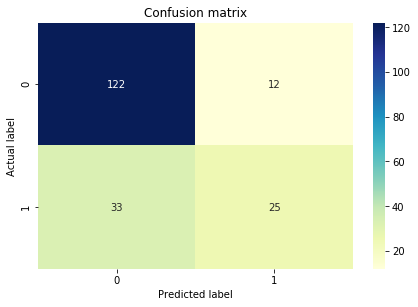

In [19]:
# Visualization of confusion matrix using Heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

class_names = [0,1]
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Model evaluation using confusion matrix 

**Accuracy** = (TP+TN) / (TP+TN+FP+FN)                                               

**Precision** = TP / (TP+FP)                                     
Precision tells us about when it predicts yes, how often is it correct.  

**Recall** = TP / (TP+FN)  ------ Recall is also known as Sensitivity or True Positive rate                                    
Recall tells us about when it's actually yes, how often does it predict yes.

**Specificity** = TN / (TN+FP) ---------- True Negative rate                                    
Recall tells us about when it's actually no, how often does it predict no.


In [17]:
print("Accuracy  :", metrics.accuracy_score(y_test, y_pred))
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall    :", metrics.recall_score(y_test, y_pred))

print("Report    :")                                     
print(metrics.classification_report(y_test, y_pred))

Accuracy  : 0.765625
Precision : 0.6756756756756757
Recall    : 0.43103448275862066
Report    :
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       134
           1       0.68      0.43      0.53        58

   micro avg       0.77      0.77      0.77       192
   macro avg       0.73      0.67      0.69       192
weighted avg       0.75      0.77      0.75       192



#### ROC Curve                                                                    
Receiver Operating Characteristic(ROC) curve is a plot of true positive rate against false positive rate.          
ROC curve is the most commonly used way to visualize the performance of a binary classifier and AUC(Area Under Curve) is the best way to summarize its performance in a single number.       

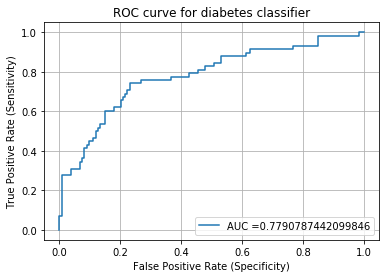

In [21]:
y_pred_proba = log.predict_proba(x_test)[::,1]

FPR, TPR, threshold = metrics.roc_curve(y_test, y_pred_proba)
AUC = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(FPR, TPR, label = "AUC ="+ str(AUC))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

AUC score for this case is 0.77                        
AUC score 1 represents perfect classifier. 